# Assignment2

Lending Club is a peer-to-peer online lending platform. It is the world’s largest marketplace connecting borrowers and investors, where consumers and small business owners lower the cost of their credit and enjoy a better experience than traditional bank lending, and investors earn attractive risk-adjusted returns.Essentially, borrowers apply for loans and are assigned an interest rate by LendingClub. Individual investors are able to choose loans to fund or invest in, raising capital for a loan in a similar way to a crowd-sourcing campaign. As an investor, your returns vary based on the loans you choose (both the interest and default rates). Therefore, if you can better predict which borrowers will pay back their loans, you can expect better investment returns.

In this assignment, you will be analyzing data from LendingClub (<a href = "https://www.lendingclub.com/">www.lendingclub.com</a>). Using the lending data from 2007-2010, you need to create models that predict whether or not borrowers paid back their loan in full. The final model should minimize the number of borrowers who actually did not pay back their load in full but predicted as they did (this is our model selection criteria).


You need to create a Random Forest model and a Support Vector model using the same training/testing data. For both models, you need to optimize the parameters using a Grid Search. 
- For random forest, test the following number of trees in the forest: 10, 50, 100, 200, 300, 500, 800
- For svm, test the following:
    - C values: 0.1,1,10
    - gamma values: "auto","scale",
    - kernel: "poly",'linear','rbf'
    
Do not drop any of the features and make sure to scale them using StandardScaler (otherwise GridSearch for SVM will take a very very long time)

At the very bottom of your notebook, please explain how your models have performed and which model performed the best given the criteria.

Here are what the columns in the data represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion. Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 1 if the borrower did not pay back their loan in full, 0 if they paid back their loan in full.




# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

# Get the Data



In [2]:
df_loan = pd.read_csv('loan_data.csv')

In [3]:
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,1,0,0,1
1,1,all_other,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,0,0,0,1
2,1,all_other,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,3,0,0,1
3,1,debt_consolidation,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,0,0,0,1
4,1,debt_consolidation,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,0,0,0,1


# Exploratory Data Analysis

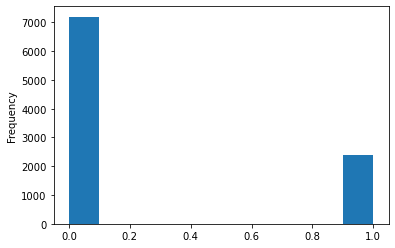

In [4]:
df_loan['not.fully.paid'].plot.hist()

# Data Cleaning

In [5]:
df_loan_new = pd.get_dummies(df_loan['purpose'])

In [6]:
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,1,0,0,1
1,1,all_other,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,0,0,0,1
2,1,all_other,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,3,0,0,1
3,1,debt_consolidation,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,0,0,0,1
4,1,debt_consolidation,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,0,0,0,1


In [7]:
df_loan = pd.concat([df_loan, df_loan_new], axis=1)
df_loan.drop(['purpose'], axis=1, inplace=True)
df_loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,1,0,0,1,0,0,1,0,0,0,0
1,1,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,0,0,0,1,1,0,0,0,0,0,0
2,1,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,3,0,0,1,1,0,0,0,0,0,0
3,1,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,0,0,0,1,0,0,1,0,0,0,0
4,1,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,0,0,0,1,0,0,1,0,0,0,0


In [8]:
df_loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.750783,0.125528,322.757966,10.928091,12.805928,708.647004,4531.012359,1.790938e+04,47.812683,1.779808,0.164022,0.063688,0.248486,0.247129,0.124243,0.408436,0.037482,0.066820,0.045834,0.070056
std,0.432582,0.027050,210.603178,0.626615,6.926247,37.836367,2507.372905,3.855329e+04,29.131930,2.447285,0.545643,0.265119,0.432158,0.431365,0.329876,0.491570,0.189949,0.249723,0.209136,0.255255
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.109900,164.562500,10.545447,7.382500,682.000000,2791.291667,3.140500e+03,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,270.410000,10.915088,12.900000,702.000000,4110.000000,8.593000e+03,47.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,444.560000,11.289832,18.180000,732.000000,5707.781250,1.849325e+04,72.100000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.180154,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test Split


In [9]:
X = df_loan.drop('not.fully.paid', axis=1)

In [10]:
y = df_loan['not.fully.paid']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Training 1st  model


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [16]:
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

# Predictions and Evaluation of 1st model


In [17]:
forest_predictions = classifier.predict(X_test_scaled)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
classifier = RandomForestClassifier(n_estimators=10, random_state=42)
classifier.fit(X_train_scaled, y_train)
forest_predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1435
           1       0.80      0.49      0.61       481

    accuracy                           0.84      1916
   macro avg       0.83      0.73      0.76      1916
weighted avg       0.84      0.84      0.83      1916

[[1377   58]
 [ 244  237]]


In [20]:
classifier = RandomForestClassifier(n_estimators=50, random_state=42)
classifier.fit(X_train_scaled, y_train)
forest_predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1435
           1       0.88      0.54      0.67       481

    accuracy                           0.87      1916
   macro avg       0.87      0.76      0.79      1916
weighted avg       0.87      0.87      0.85      1916

[[1401   34]
 [ 222  259]]


In [21]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)
forest_predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1435
           1       0.89      0.54      0.67       481

    accuracy                           0.87      1916
   macro avg       0.88      0.76      0.80      1916
weighted avg       0.87      0.87      0.86      1916

[[1403   32]
 [ 220  261]]


In [22]:
classifier = RandomForestClassifier(n_estimators=200, random_state=42)
classifier.fit(X_train_scaled, y_train)
forest_predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1435
           1       0.91      0.54      0.68       481

    accuracy                           0.87      1916
   macro avg       0.89      0.76      0.80      1916
weighted avg       0.88      0.87      0.86      1916

[[1408   27]
 [ 219  262]]


In [23]:
classifier = RandomForestClassifier(n_estimators=300, random_state=42)
classifier.fit(X_train_scaled, y_train)
forest_predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1435
           1       0.90      0.54      0.68       481

    accuracy                           0.87      1916
   macro avg       0.88      0.76      0.80      1916
weighted avg       0.87      0.87      0.86      1916

[[1407   28]
 [ 221  260]]


In [24]:
classifier = RandomForestClassifier(n_estimators=500, random_state=42)
classifier.fit(X_train_scaled, y_train)
forest_predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1435
           1       0.90      0.54      0.68       481

    accuracy                           0.87      1916
   macro avg       0.88      0.76      0.80      1916
weighted avg       0.87      0.87      0.86      1916

[[1407   28]
 [ 221  260]]


In [25]:
classifier = RandomForestClassifier(n_estimators=800, random_state=42)
classifier.fit(X_train_scaled, y_train)
forest_predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1435
           1       0.91      0.54      0.68       481

    accuracy                           0.87      1916
   macro avg       0.89      0.76      0.80      1916
weighted avg       0.87      0.87      0.86      1916

[[1408   27]
 [ 221  260]]


# Training 2nd model

In [26]:
from sklearn.svm import SVC

In [27]:
svc_model = SVC()

In [28]:
svc_model.fit(X_train_scaled, y_train)

SVC()

# Predictions and Evaluation of 2nd model

In [29]:
predictions = svc_model.predict(X_test_scaled)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test, predictions))

[[1383   52]
 [ 427   54]]


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1435
           1       0.51      0.11      0.18       481

    accuracy                           0.75      1916
   macro avg       0.64      0.54      0.52      1916
weighted avg       0.70      0.75      0.68      1916



In [33]:
param_grid = {'C': [0.1, 1, 10], 'gamma': ["auto","scale"],'kernel': ['poly', 'linear','rbf']} 

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [36]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.1, gamma=auto, kernel=poly ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.756, total=   1.0s
[CV] C=0.1, gamma=auto, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.762, total=   1.1s
[CV] C=0.1, gamma=auto, kernel=poly ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.759, total=   1.0s
[CV] C=0.1, gamma=auto, kernel=poly ..................................
[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.765, total=   1.0s
[CV] C=0.1, gamma=auto, kernel=poly ..................................
[CV] ...... C=0.1, gamma=auto, kernel=poly, score=0.759, total=   1.1s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.752, total=   0.6s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.752, total=   0.6s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.753, total=   0.6s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.752, total=   0.6s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .

[CV] ....... C=10, gamma=auto, kernel=poly, score=0.759, total=   3.4s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV] ....... C=10, gamma=auto, kernel=poly, score=0.770, total=   3.3s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV] ....... C=10, gamma=auto, kernel=poly, score=0.770, total=   3.1s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV] ....... C=10, gamma=auto, kernel=poly, score=0.777, total=   3.3s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV] ....... C=10, gamma=auto, kernel=poly, score=0.774, total=   2.9s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] ..... C=10, gamma=auto, kernel=linear, score=0.752, total=   5.8s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] ..... C=10, gamma=auto, kernel=linear, score=0.752, total=   4.8s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'linear', 'rbf']},
             verbose=3)

In [37]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [38]:
grid.best_estimator_

SVC(C=10)

In [39]:
grid_predictions = grid.predict(X_test_scaled)

In [40]:
print(confusion_matrix(y_test, grid_predictions))

[[1332  103]
 [ 348  133]]


In [41]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1435
           1       0.56      0.28      0.37       481

    accuracy                           0.76      1916
   macro avg       0.68      0.60      0.61      1916
weighted avg       0.74      0.76      0.73      1916



# Conclusion

The confusion matrix for SVC is interpreted as below: 
Accuracy : (TP+TN)/Total = (133+1332)/1916 = 0.764
Error : (FN+FP)/Total = (348+103)/1916 = 0.235
Recall : TP/(TP+FN) = 133/(133+348) = 133/481 = 0.276
Precision : TP/(TP+FP) = 133/(133+103) = 133/236 = 0.56


The confusion matrix for RandomForestClassifier is interpreted as below: 
estimator : 10,50,100,200,300,500 and 800 


estimator =10
Accuracy : (TP+TN)/Total = (1377+237)/1916 = 0.842
Error : (FN+FP)/Total = (244+58)/1916 = 0.157
Recall : TP/(TP+FN) = 237/(237+244) = 237/481 = 0.492
Precision : TP/(TP+FP) = 237/(237+58) = 237/295 = 0.803
FP=58

estimator =50
Accuracy : (TP+TN)/Total = (1401+259)/1916 = 0.866
Error : (FN+FP)/Total = (222+34)/1916 = 0.133
Recall : TP/(TP+FN) = 259/(259+222) = 259/481 = 0.538
Precision : TP/(TP+FP) = 259/(259+34) = 259/293 = 0.88
FP=34


estimator = 100
Accuracy : (TP+TN)/Total = (1403+261)/1916 = 0.86
Error : (FN+FP)/Total = (220+32)/1916 = 0.131
Recall : TP/(TP+FN) = 261/(261+220) = 261/481 = 0.542
Precision : TP/(TP+FP) = 261/(261+32) = 261/293 = 0.890
FP=32

estimator = 200
Accuracy : (TP+TN)/Total = (1408+262)/1916 = 0.871
Error : (FN+FP)/Total = (219+27)/1916 = 0.128
Recall : TP/(TP+FN) = 262/(262+219) = 262/481 = 0.544
Precision : TP/(TP+FP) = 262/(262+27) = 262/289 = 0.90
FP=27


estimator = 800
Accuracy : (TP+TN)/Total = (1408+260)/1916 = 0.870
Error : (FN+FP)/Total = (221+27)/1916 = 0.129
Recall : TP/(TP+FN) = 260/(260+221) = 260/481 = 0.540
Precision : TP/(TP+FP) = 260/(260+27) = 260/287 = 0.905
FP=27





Comparing both the models, performance of Random Forest is good, when we are changing the estimators, we are getting the better result. Accuracy rate is 0.87 in Random Forest model and Accuracy rate is 0.76 in SVC model.
Random Forest, FP=27 (False positive are less). SVC model, FP=103. Random Forest model, The accuracy rate is higher than the SVC model, False positive are less than the SVC model. So Random forest model can better predict the "borrowers will pay back their loans". We can conclude that "Random Forest Model performance is better than the SVC model".